In [1]:
import spikeinterface.extractors as se
import spikeinterface.preprocessing as sp
import spikeinterface.widgets as sw
import spikeinterface as si
from pathlib import Path
import time
import matplotlib.pyplot as plt

c:\Users\Windows\.conda\envs\ms10\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
rec_folder = r"D:\cl\rf_reconstruction\head_fixed\CnL22_20241113_155342.rec"
animal_id = 'CnL22'
session_id = '20241113_155342'
ish = '3'
nwb_folder = Path(rec_folder) / f'{animal_id}_{session_id}.recsh{ish}.nwb'
out_folder = Path('sortout') / animal_id / session_id / ish

In [ ]:
rec = se.NwbRecordingExtractor(nwb_folder)

In [26]:
rec.get_total_duration()

1015.8208333333333

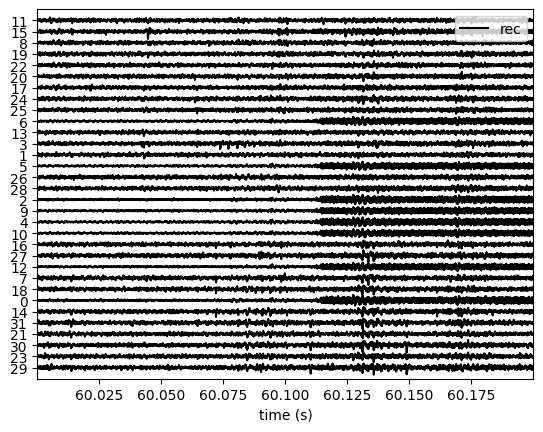

In [24]:
start_time = 60
time_range = [start_time, start_time + .2]

rec_filt = sp.bandpass_filter(rec, freq_min=300, freq_max=6000, dtype='int32')
rec_cr = sp.common_reference(rec_filt, reference='global', operator='median')
# rec_preprocessed = sp.whiten(rec_cr, dtype='float32')
rec_for_wvf_extraction = rec_filt

sw.plot_traces(rec_cr, backend='matplotlib', time_range=time_range,
                   order_channel_by_depth=True, show_channel_ids=True)

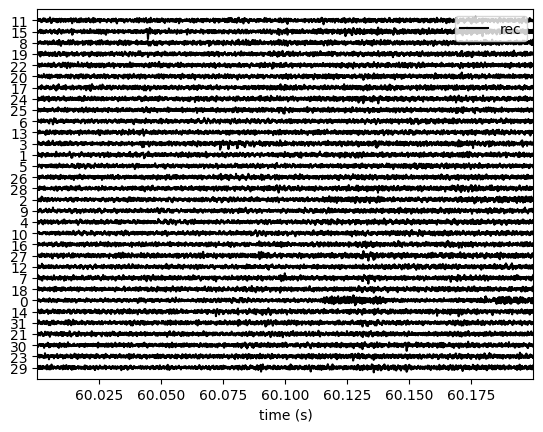

In [25]:
rec_whiten = sp.whiten(rec_cr, dtype='float32')
sw.plot_traces(rec_whiten, backend='matplotlib', time_range=time_range,
                   order_channel_by_depth=True, show_channel_ids=True)

In [3]:
analyzer_folder = r"\\10.129.151.108\xieluanlabs\xl_cl\code\sortout\CnL22\20241113_155342\3\sorting_results_20241114_1224\sorting_analyzer"
sorting_analyzer = si.load_sorting_analyzer(analyzer_folder)
sorting_analyzer

SortingAnalyzer: 32 channels - 9 units - 1 segments - binary_folder - sparse - has recording
Loaded 7 extensions: amplitude_scalings, noise_levels, random_spikes, spike_amplitudes, templates, template_metrics, waveforms

In [ ]:
sort_out_folder = Path(r"")

In [7]:
sorting_analyzer.compute("random_spikes")
sorting_analyzer.compute("waveforms", ms_before=1.0, ms_after=2.0)
sorting_analyzer.compute(["templates", "quality_metrics","noise_levels", "amplitude_scalings", "template_metrics", "spike_amplitudes"])

Deleting waveforms
Deleting templates
Deleting template_metrics
Deleting spike_amplitudes
Deleting amplitude_scalings


c:\Users\Windows\.conda\envs\ms10\lib\site-packages\spikeinterface\core\job_tools.py:103: UserWarning: `n_jobs` is not set so parallel processing is disabled! To speed up computations, it is recommended to set n_jobs either globally (with the `spikeinterface.set_global_job_kwargs()` function) or locally (with the `n_jobs` argument). Use `spikeinterface.set_global_job_kwargs?` for more information about job_kwargs.
  warnings.warn(
Compute : amplitude_scalings + spike_amplitudes: 100%|##########| 1023/1023 [00:45<00:00, 22.34it/s]
c:\Users\Windows\.conda\envs\ms10\lib\site-packages\spikeinterface\qualitymetrics\misc_metrics.py:902: UserWarning: Some units have too few spikes : amplitude_cutoff is set to NaN
  warnings.warn(f"Some units have too few spikes : amplitude_cutoff is set to NaN")


In [5]:
sorting = sorting_analyzer.sorting
sorting

NumpySorting: 9 units - 1 segments - 30.0kHz

In [10]:
for unit_id in sorting.get_unit_ids():
    sw.plot_unit_summary(sorting_analyzer, unit_id=unit_id)
    plt.savefig(sort_out_folder / f'unit_summary_{unit_id}.png')
    plt.close()

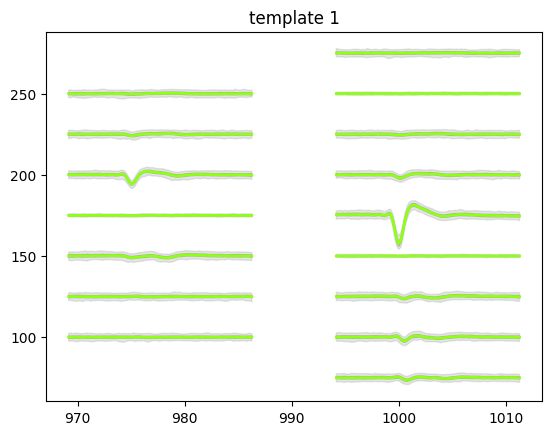

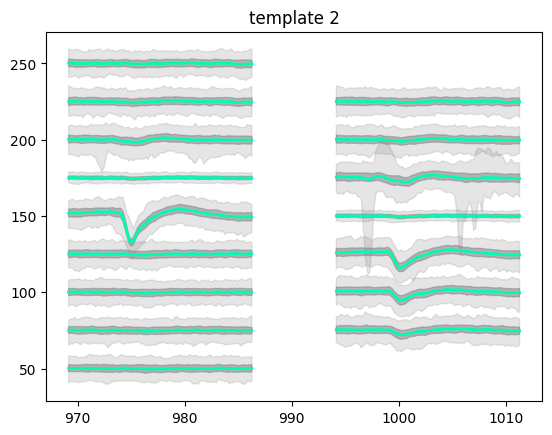

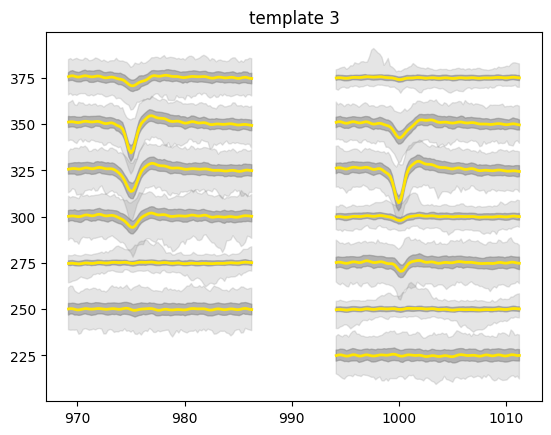

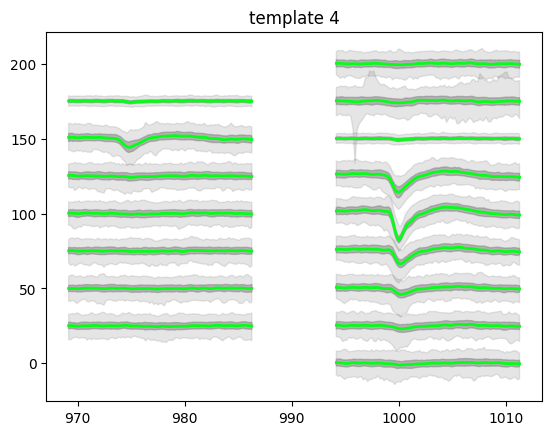

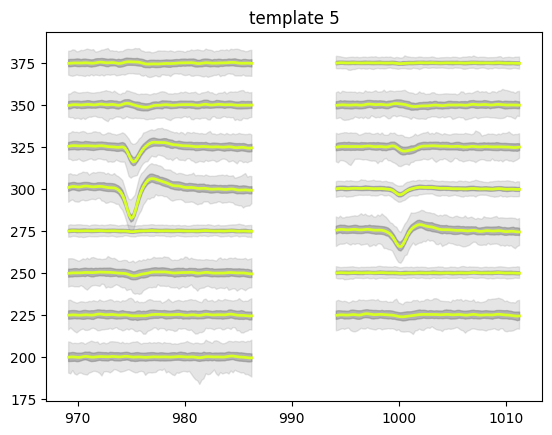

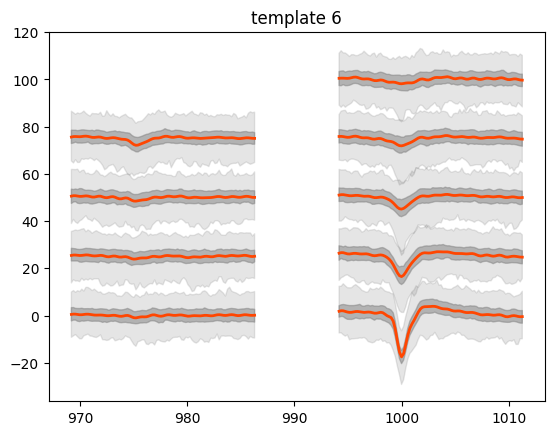

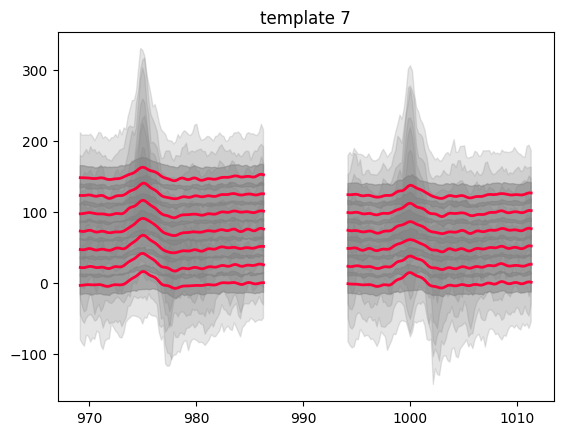

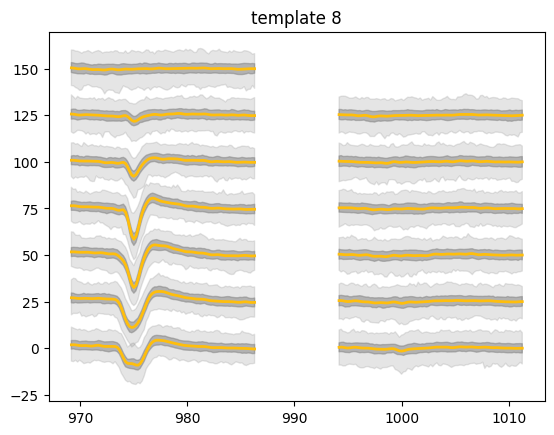

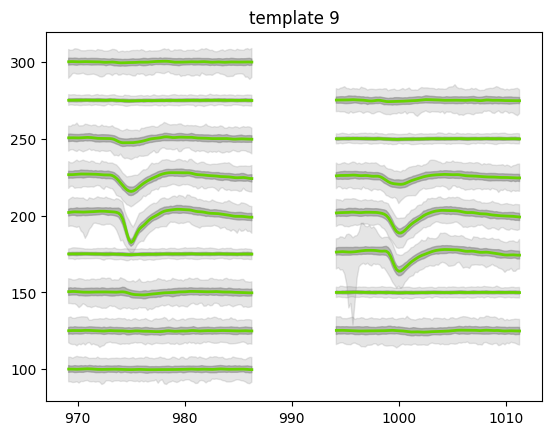

In [6]:
for unit_id in sorting.unit_ids:
    sw.plot_unit_templates(sorting_analyzer, unit_ids=[unit_id])
    plt.savefig(sort_out_folder / f'unit_templates_{unit_id}.png')

AssertionError: You must run the extension spike_amplitudes before retrieving data

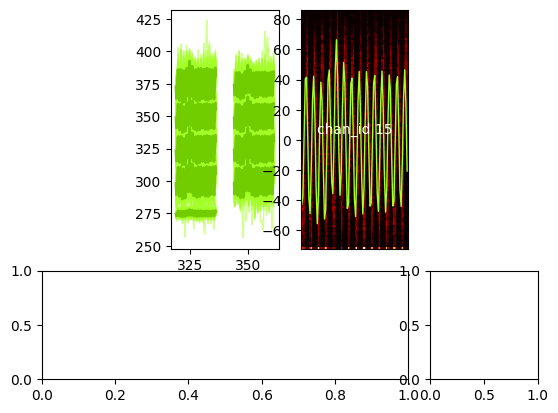

In [15]:
for unit_id in sorting.get_unit_ids():
    sw.plot_unit_summary(sorting_analyzer, unit_id=unit_id)
    plt.savefig(sort_out_folder / f'unit_summary_{unit_id}.png')

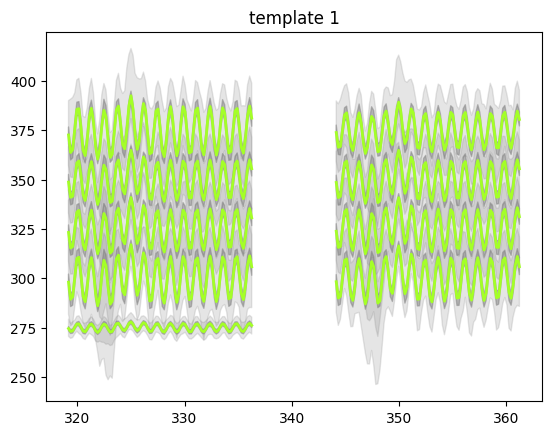

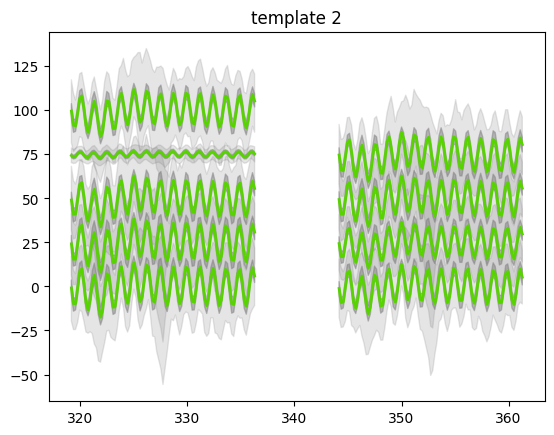

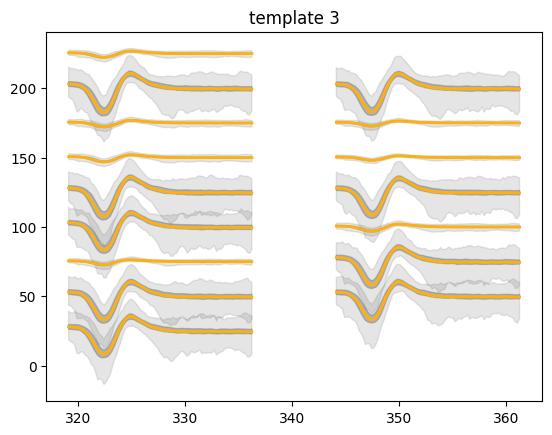

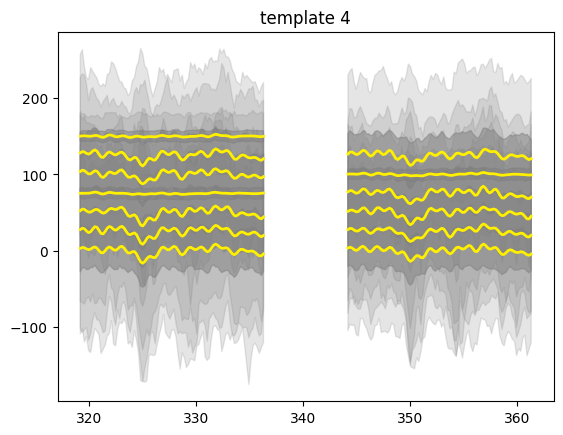